In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
data=pd.read_csv(r'/content/icc wc.csv')
data.head()


,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id
0,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,1,0
1,Shubman Gill,c Mendis b Madushanka,92,92,136,11,2,100.00,India,Sri Lanka,1,0
2,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,1,0
3,Shreyas Iyer,c Theekshana b Madushanka,82,56,84,3,6,146.42,India,Sri Lanka,1,0
4,KL Rahul,c Hemantha b Chameera,21,19,34,2,0,110.52,India,Sri Lanka,1,0


In [10]:
data.tail()

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id
870,Iftikhar Ahmed,c Malan b Ali,3,5,8,0,0,60.00,Pakistan,England,2,47
871,Shadab Khan,b Rashid,4,7,4,1,0,57.14,Pakistan,England,2,47
872,Shaheen Shah Afridi,lbw b Atkinson,25,23,23,3,1,108.69,Pakistan,England,2,47
873,Mohammad Wasim,not out,16,14,33,2,1,114.28,Pakistan,England,2,47
874,Haris Rauf,c Stokes b Woakes,35,23,27,3,3,152.17,Pakistan,England,2,47


In [11]:
data.isna().sum()

player         0
dismissal      0
runs           0
balls          0
minutes        0
4s             0
6s             0
strike_rate    0
team           0
opponent       0
innings        0
match_id       0
dtype: int64

In [ ]:
data.shape

(875, 12)

In [12]:
data.dtypes

player          object
dismissal       object
runs             int64
balls            int64
minutes          int64
4s               int64
6s               int64
strike_rate    float64
team            object
opponent        object
innings          int64
match_id         int64
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 875 entries, 0 to 874
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player       875 non-null    object 
 1   dismissal    875 non-null    object 
 2   runs         875 non-null    int64  
 3   balls        875 non-null    int64  
 4   minutes      875 non-null    int64  
 5   4s           875 non-null    int64  
 6   6s           875 non-null    int64  
 7   strike_rate  875 non-null    float64
 8   team         875 non-null    object 
 9   opponent     875 non-null    object 
 10  innings      875 non-null    int64  
 11  match_id     875 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 82.2+ KB


In [14]:
data.describe()

,runs,balls,minutes,4s,6s,strike_rate,innings,match_id
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,26.773714,29.090286,42.259429,2.558857,0.736000,82.771337,1.459429,23.186286
std,31.018840,28.579166,41.752733,3.148084,1.490633,53.106854,0.498636,13.828329
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.000000,8.000000,12.000000,0.000000,0.000000,50.000000,1.000000,11.500000
50%,15.000000,19.000000,27.000000,1.000000,0.000000,80.430000,1.000000,23.000000
75%,39.000000,40.500000,59.000000,4.000000,1.000000,106.660000,2.000000,35.000000
max,201.000000,143.000000,217.000000,21.000000,11.000000,600.000000,2.000000,47.000000


<ipython-input-17-efbac26ab49b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  total_runs= sns.barplot(x='team', y='runs', data=team_performance, palette="viridis")
<ipython-input-17-efbac26ab49b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  total_runs.set_xticklabels(total_runs.get_xticklabels(), rotation=45, ha="right")


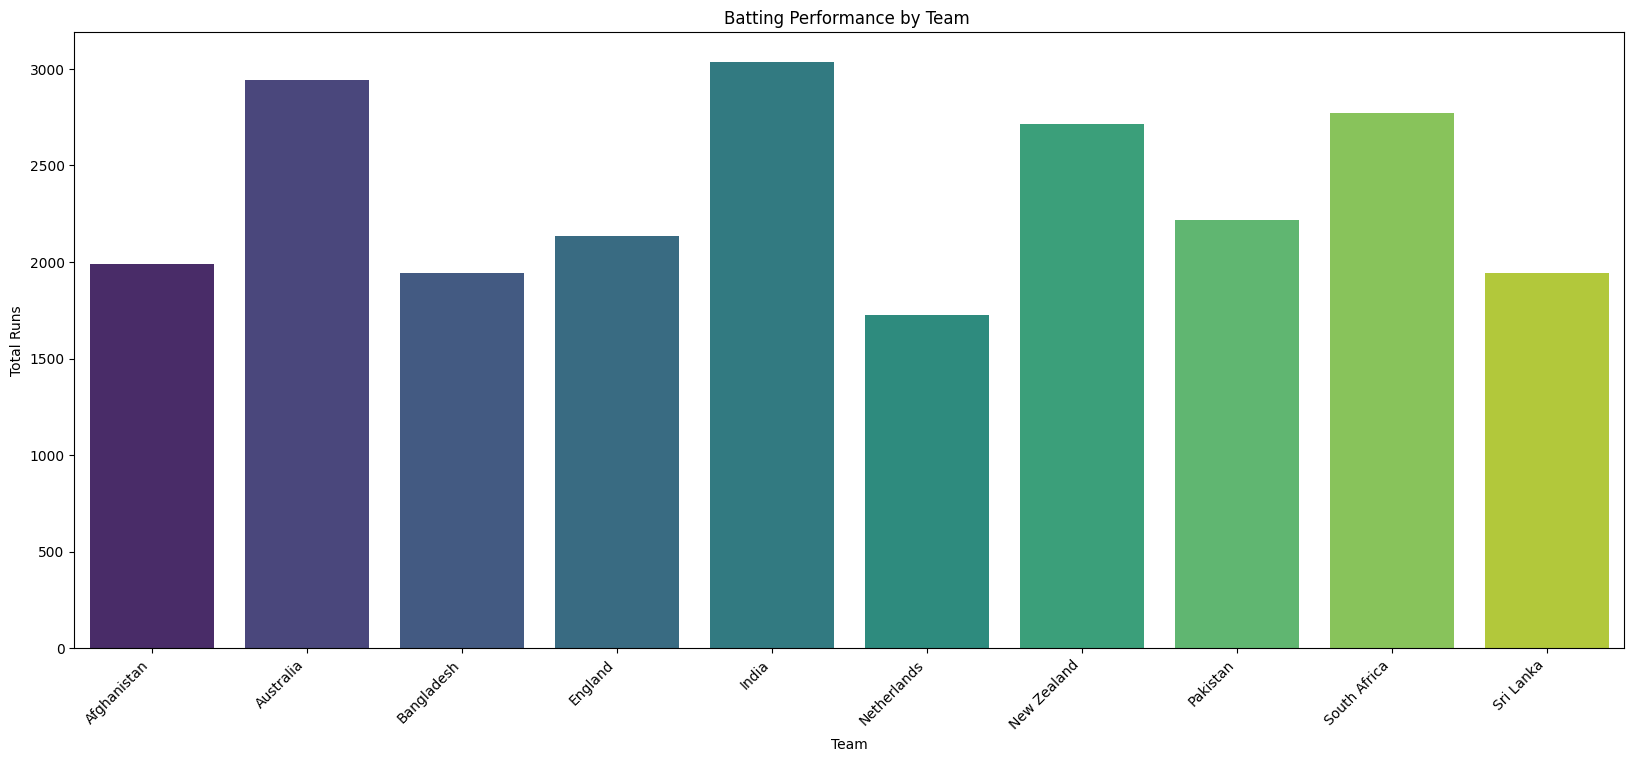

In [17]:
# Batting performance by team
team_performance = data.groupby('team').agg({
    'runs': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'balls': 'sum'
}).reset_index()
# Bar plot for total runs by team
plt.figure(figsize=(20, 8))
total_runs= sns.barplot(x='team', y='runs', data=team_performance, palette="viridis")
total_runs.set_xticklabels(total_runs.get_xticklabels(), rotation=45, ha="right")
plt.title('Batting Performance by Team ')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.show()


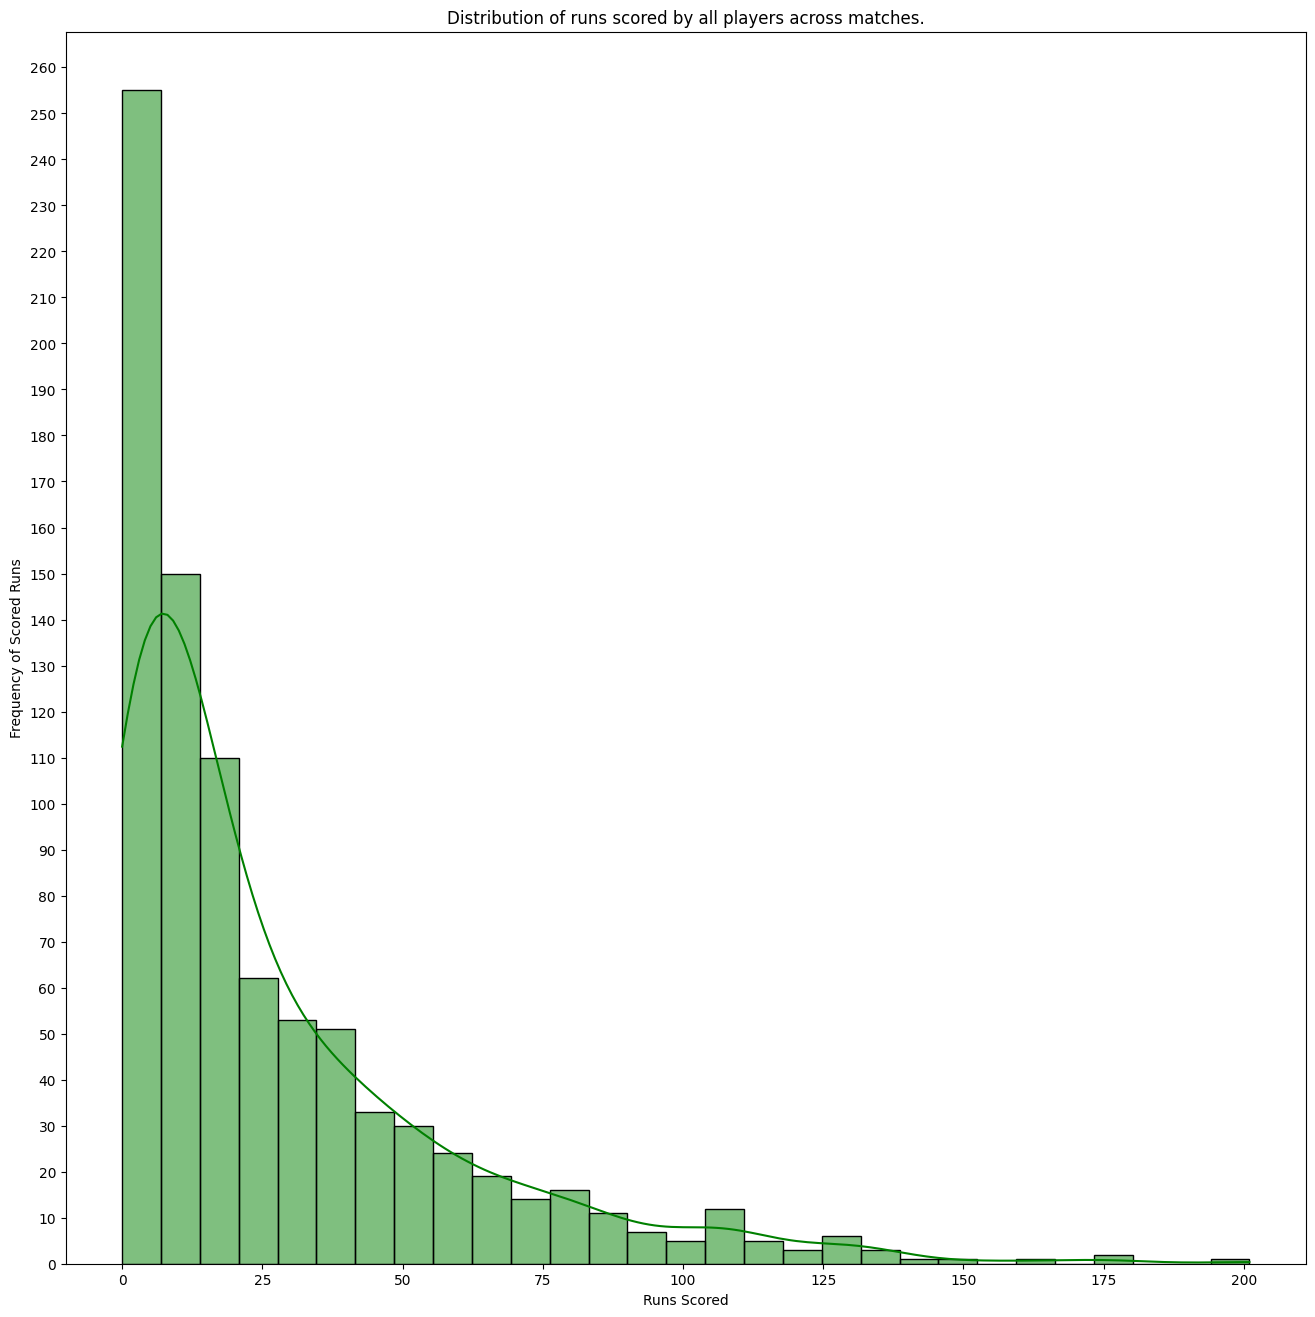

In [18]:
# distribution of runs scored by all players across matches.
plt.figure(figsize=(16, 16))
sns.histplot(data['runs'], kde=True, color='green')
plt.xlabel("Runs Scored")
plt.ylabel("Frequency of Scored Runs")
plt.title("Distribution of runs scored by all players across matches.")
plt.yticks(np.arange(0, 270, 10))
plt.show()


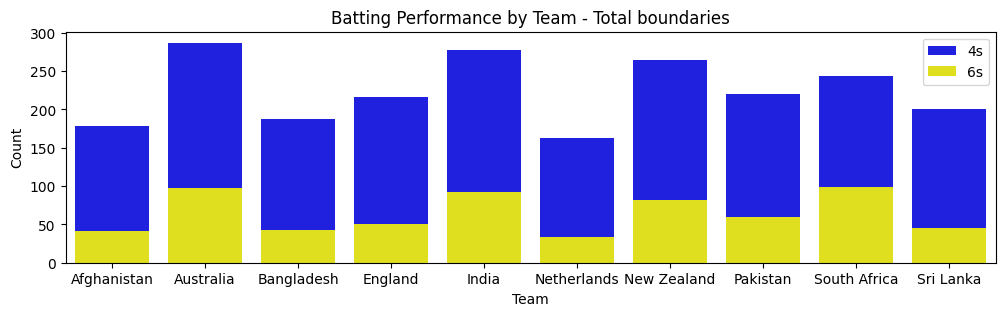

In [19]:
#Plot for total 4s and 6s (boundaries) by team
plt.figure(figsize=(12, 3))
boundaries_plot = sns.barplot(x='team', y='4s', data=team_performance, color='blue', label='4s')
boundaries_plot = sns.barplot(x='team', y='6s', data=team_performance, color='yellow', label='6s')
plt.title('Batting Performance by Team - Total boundaries')
plt.xlabel('Team')
plt.ylabel('Count')
plt.legend()
plt.show()

In [22]:
d1 = data.query('team == "India"').copy()
d1.head()

,player,dismissal,runs,balls,minutes,4s,6s,strike_rate,team,opponent,innings,match_id
0,Rohit Sharma,b Madushanka,4,2,2,1,0,200.00,India,Sri Lanka,1,0
1,Shubman Gill,c Mendis b Madushanka,92,92,136,11,2,100.00,India,Sri Lanka,1,0
2,Virat Kohli,c Nissanka b Madushanka,88,94,139,11,0,93.61,India,Sri Lanka,1,0
3,Shreyas Iyer,c Theekshana b Madushanka,82,56,84,3,6,146.42,India,Sri Lanka,1,0
4,KL Rahul,c Hemantha b Chameera,21,19,34,2,0,110.52,India,Sri Lanka,1,0


In [23]:
d1.drop_duplicates(inplace=True)

In [24]:
# Most runs getter batsmen for India

d1.groupby('player').agg({'runs': 'sum'}).sort_values(by='runs', ascending=False)


,runs
player,
Virat Kohli,765
Rohit Sharma,597
Shreyas Iyer,530
KL Rahul,452
Shubman Gill,354
Ravindra Jadeja,120
Suryakumar Yadav,106
Ishan Kishan,47
Kuldeep Yadav,19


<ipython-input-25-086b23c3264b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player', y='runs', data=top_5_batsmen, palette='viridis')


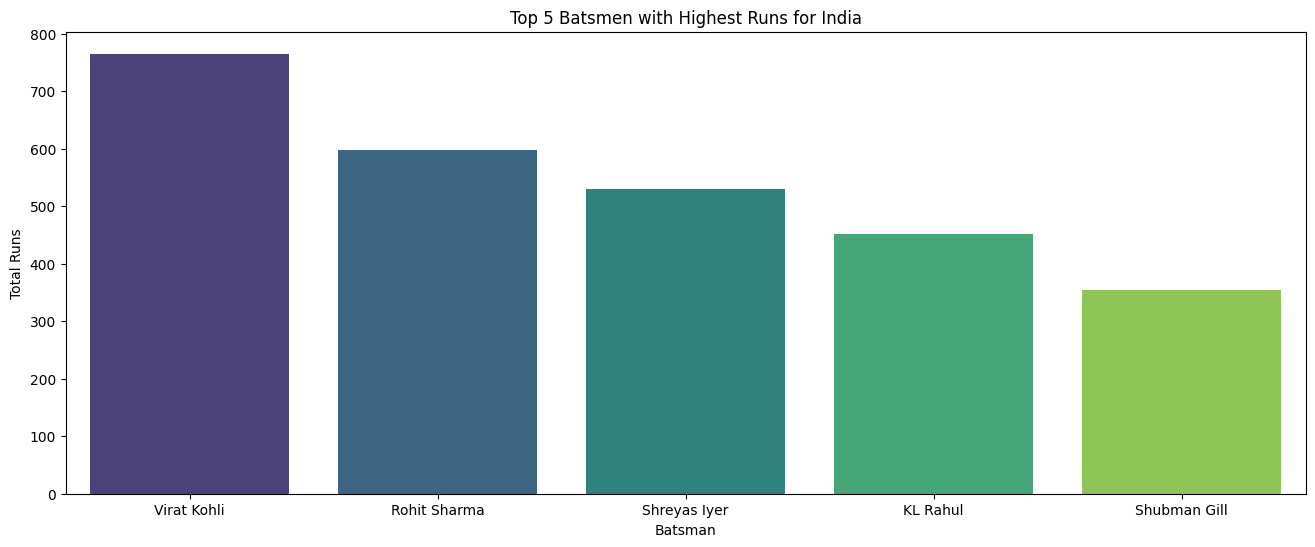

In [25]:
# prompt: plot top 5 batsmen who scores highest

import matplotlib.pyplot as plt
top_5_batsmen = d1.groupby('player').agg({'runs': 'sum'}).sort_values(by='runs', ascending=False).head(5)
plt.figure(figsize=(16, 6))
sns.barplot(x='player', y='runs', data=top_5_batsmen, palette='viridis')
plt.title('Top 5 Batsmen with Highest Runs for India')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.show()


In [26]:
d2 = d1.groupby("player") \
    .agg({"player" :'count' , "strike_rate" : 'mean', "runs": 'sum' }) \
    .query('player>=5') \
    .rename(columns = {"player" : "Match_played"}) \
    .sort_values("strike_rate" ,ascending = False)
d2

,Match_played,strike_rate,runs
player,,,
Rohit Sharma,11,127.897273,597
Suryakumar Yadav,7,108.428571,106
Ravindra Jadeja,5,106.044000,120
Shubman Gill,9,103.162222,354
KL Rahul,10,96.785000,452
Shreyas Iyer,11,96.670909,530
Virat Kohli,11,83.206364,765


<ipython-input-27-b24b826ace80>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='player', y='strike_rate', data=d2, palette='viridis')


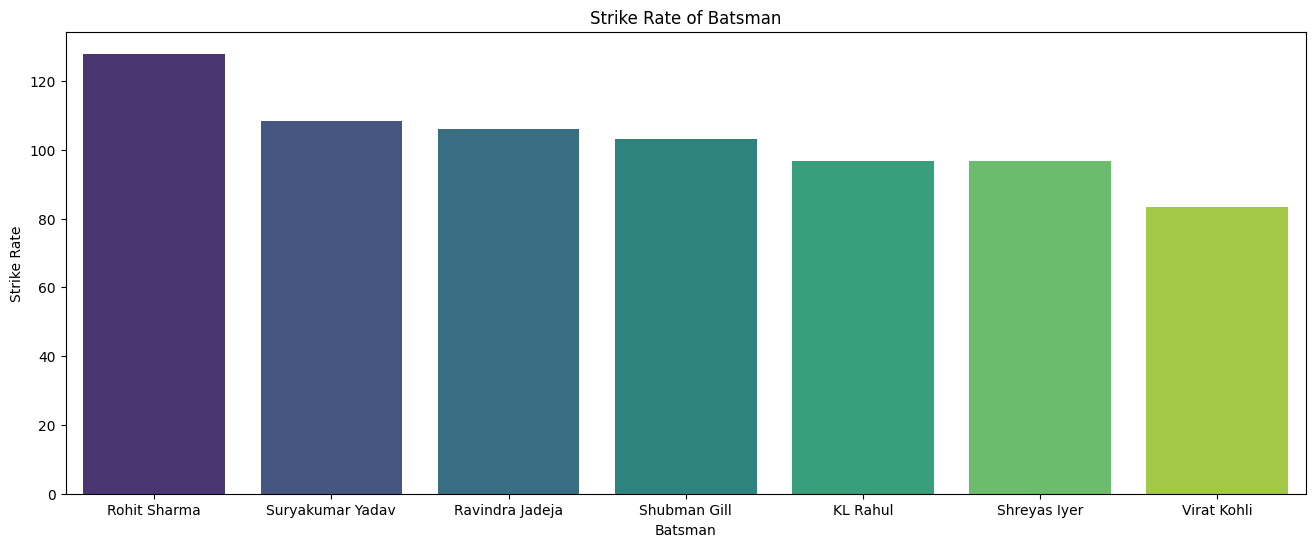

In [27]:
# prompt: plot for strike rate

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.barplot(x='player', y='strike_rate', data=d2, palette='viridis')
plt.title('Strike Rate of Batsman')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.show()


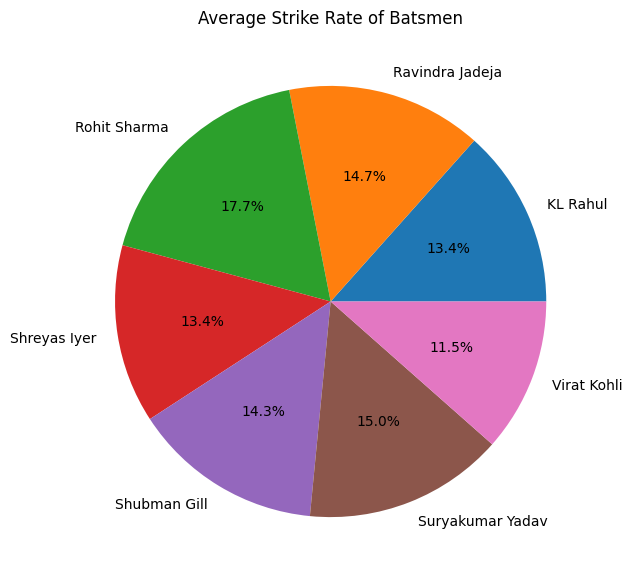

In [28]:
#  piechart for avg strike rate of  Indian batsmen

import matplotlib.pyplot as plt
# Calculate the average strike rate for each batsman
avg_strike_rate = d2.groupby('player')['strike_rate'].mean().reset_index()

# Create a pie chart of the average strike rate for each batsman
plt.figure(figsize=(10, 7))
plt.pie(avg_strike_rate['strike_rate'], labels=avg_strike_rate['player'], autopct="%1.1f%%")
plt.title('Average Strike Rate of Batsmen')
plt.show()
